<a href="https://colab.research.google.com/github/Mahdi-0599/NLP-HATESPEECH/blob/master/work102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/012101/190312276012.jpg


In [ ]:
#importing required modules
from keras.applications import VGG16
#loading the saved model
#we are using the complete architecture thus include_top=True
model = VGG16(weights='imagenet',include_top=True)
#show the summary of model
model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
#creating a mapping of layer name ot layer details 
#we will create a dictionary layers_info which maps a layer name to its charcteristics
layers_info = {}
for i in model.layers:
    layers_info[i.name] = i.get_config()

#here the layer_weights dictionary will map every layer_name to its corresponding weights
layer_weights = {}
for i in model.layers:
    layer_weights[i.name] = i.get_weights()

print(layers_info['block5_conv1'])

{'name': 'block5_conv1', 'trainable': True, 'dtype': 'float32', 'filters': 512, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


In [ ]:
!pip install keras-vis

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import theano
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
from skimage import filters
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from theano import tensor as T
img = cv.imread('../input/012101/190312276012.jpg')
import numpy as np
from subprocess import check_output#importing the required modules
#from vis.visualization import visualize_activation
#from vis.utils import utils
from keras import activations
from keras import applications
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,6)

In [ ]:
img = cv.imread('../input/012101/190312276012.jpg')

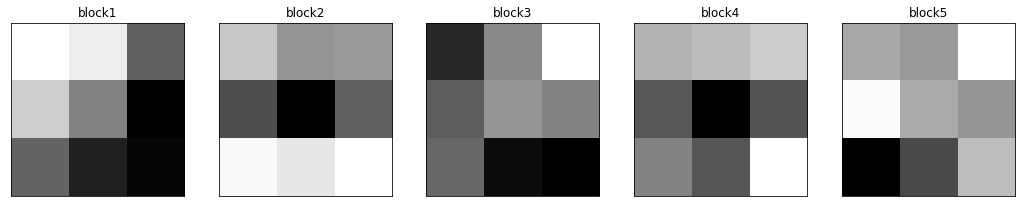

In [ ]:
layers = model.layers
layer_ids = [1,4,7,11,15]
#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(5):
    ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')
    ax[i].set_title('block'+str(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [ ]:
#importing the required modules
#from vis.visualization import visualize_activation
#from vis.utils import utils
from keras import activations
from keras import applications
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,6)
#creating a VGG16 model using fully connected layers also because then we can 
#visualize the patterns for individual category
from keras.applications import VGG16
model = VGG16(weights='imagenet',include_top=True)

#finding out the layer index using layer name
#the find_layer_idx function accepts the model and name of layer as parameters and return the index of respective layer
#layer_idx = utils.find_layer_idx(model,'predictions')
#changing the activation of the layer to linear
#model.layers[layer_idx].activation = activations.linear
#applying modifications to the model
#model = utils.apply_modifications(model)
#Indian elephant
#img3 = visualize_activation(model,layer_idx,filter_indices=385,max_iter=5000,verbose=True)
#plt.imshow(img3)

Here, we assign the probability as pixel values for every part of the image and then standardize them to generate a heatmap:

In [ ]:
import numpy as np

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.activations import relu

%matplotlib inline
import matplotlib.pyplot as plt
def iter_occlusion(image, size=8):

    occlusion = np.full((size * 5, size * 5, 1), [0.5], np.float32)
    occlusion_center = np.full((size, size, 1), [0.5], np.float32)
    occlusion_padding = size * 2

    # print('padding...')
    image_padded = np.pad(image, ( \
                        (occlusion_padding, occlusion_padding), (occlusion_padding, occlusion_padding), (0, 0) \
                        ), 'constant', constant_values = 0.0)

    for y in range(occlusion_padding, image.shape[0] + occlusion_padding, size):

        for x in range(occlusion_padding, image.shape[1] + occlusion_padding, size):
            tmp = image_padded.copy()

            tmp[y - occlusion_padding:y + occlusion_center.shape[0] + occlusion_padding, \
                x - occlusion_padding:x + occlusion_center.shape[1] + occlusion_padding] \
                = occlusion

            tmp[y:y + occlusion_center.shape[0], x:x + occlusion_center.shape[1]] = occlusion_center

            yield x - occlusion_padding, y - occlusion_padding, \
                  tmp[occlusion_padding:tmp.shape[0] - occlusion_padding, occlusion_padding:tmp.shape[1] - occlusion_padding]


The above code defines a function iter_occlusion that returns an image with different masked portions.

Now, let’s import the image and plot it:

Text(0.5, 1.0, 'ORIGINAL IMAGE')

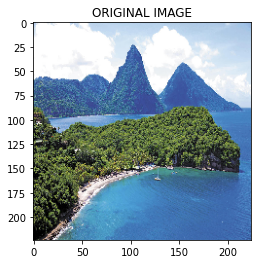

In [ ]:

from keras.preprocessing.image import load_img
# load an image from file
image = load_img('../input/012101/190312276012.jpg', target_size=(224, 224))
plt.imshow(image)
plt.title('ORIGINAL IMAGE')

Now, we’ll follow three steps:

Preprocess this image
Calculate the probabilities for different masked portions
Plot the heatmap

(224, 224, 3)
0 0 0  -  (224, 224, 3)
14 0 1  -  (224, 224, 3)
28 0 2  -  (224, 224, 3)
42 0 3  -  (224, 224, 3)
56 0 4  -  (224, 224, 3)
70 0 5  -  (224, 224, 3)
84 0 6  -  (224, 224, 3)
98 0 7  -  (224, 224, 3)
112 0 8  -  (224, 224, 3)
126 0 9  -  (224, 224, 3)
140 0 10  -  (224, 224, 3)
154 0 11  -  (224, 224, 3)
168 0 12  -  (224, 224, 3)
182 0 13  -  (224, 224, 3)
196 0 14  -  (224, 224, 3)
210 0 15  -  (224, 224, 3)
0 14 16  -  (224, 224, 3)
14 14 17  -  (224, 224, 3)
28 14 18  -  (224, 224, 3)
42 14 19  -  (224, 224, 3)
56 14 20  -  (224, 224, 3)
70 14 21  -  (224, 224, 3)
84 14 22  -  (224, 224, 3)
98 14 23  -  (224, 224, 3)
112 14 24  -  (224, 224, 3)
126 14 25  -  (224, 224, 3)
140 14 26  -  (224, 224, 3)
154 14 27  -  (224, 224, 3)
168 14 28  -  (224, 224, 3)
182 14 29  -  (224, 224, 3)
196 14 30  -  (224, 224, 3)
210 14 31  -  (224, 224, 3)
0 28 32  -  (224, 224, 3)
14 28 33  -  (224, 224, 3)
28 28 34  -  (224, 224, 3)
42 28 35  -  (224, 224, 3)
56 28 36  -  (224, 224, 3)


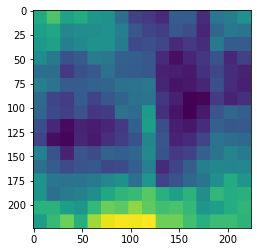

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
temp = image[0]
print(temp.shape)
heatmap = np.zeros((224,224))
correct_class = np.argmax(yhat)
for n,(x,y,image) in enumerate(iter_occlusion(temp,14)):
    heatmap[x:x+14,y:y+14] = model.predict(image.reshape((1, image.shape[0], image.shape[1], image.shape[2])))[0][correct_class]
    print(x,y,n,' - ',image.shape)
heatmap1 = heatmap/heatmap.max()
plt.imshow(heatmap)

Really interesting. We will now create a mask using the standardized heatmap probabilities and plot it:



/opt/conda/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


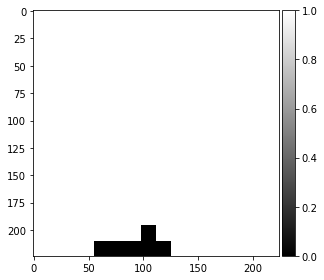

In [ ]:
import skimage.io as io
#creating mask from the standardised heatmap probabilities
mask = heatmap1 < 0.85
mask1 = mask *256
mask = mask.astype(int)
io.imshow(mask,cmap='gray')

Finally, we will impose the mask on our input image and plot that as well:



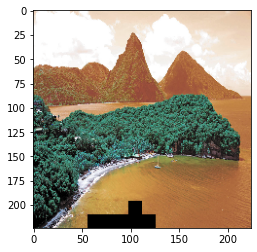

In [ ]:
import cv2
#read the image
image = cv2.imread('../input/012101/190312276012.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#resize image to appropriate dimensions
image = cv2.resize(image,(224,224))
mask = mask.astype('uint8')
#apply the mask to the image
final = cv2.bitwise_and(image,image,mask = mask)
final = cv2.cvtColor(final,cv2.COLOR_BGR2RGB)
#plot the final image
plt.imshow(final)

Visualizing the Process – Layerwise Output Visualization
The starting layers of a CNN generally look for low-level features like edges. The features change as we go deeper into the model.

Visualizing the output at different layers of the model helps us see what features of the image are highlighted at the respective layer. This step is particularly important to fine-tune an architecture for our problems. Why? Because we can see which layers give what kind of features and then decide which layers we want to use in our model.

For example, visualizing layer outputs can help us compare the performance of different layers in the neural style transfer problem.

Let’s see how we can get the output at different layers of a VGG16 model:

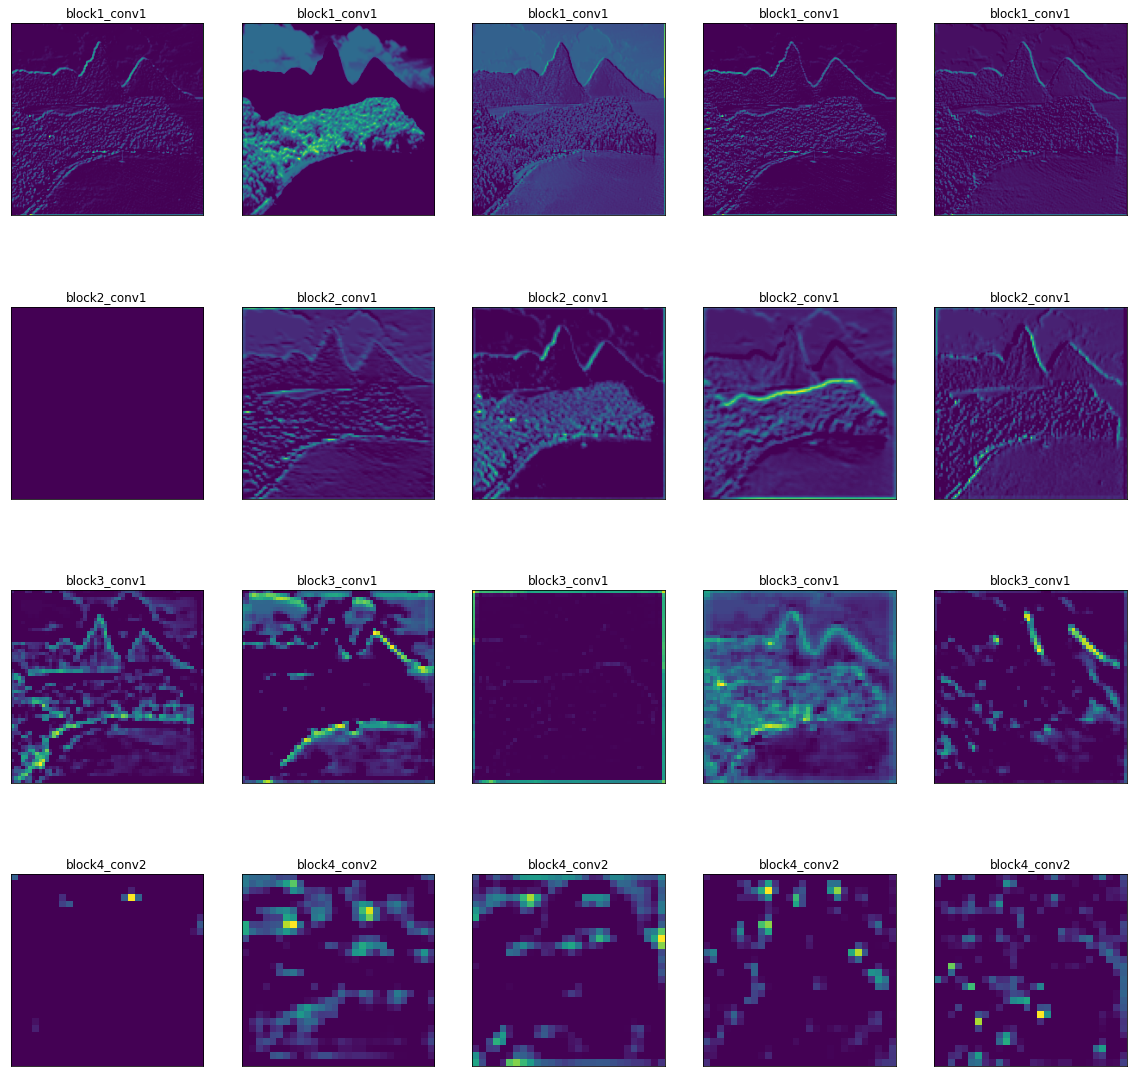

In [ ]:
#importing required libraries and functions
from keras.models import Model
#defining names of layers from which we will take the output
layer_names = ['block1_conv1','block2_conv1','block3_conv1','block4_conv2']
outputs = []
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
#extracting the output and appending to outputs
for layer_name in layer_names:
    intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)
#plotting the outputs
fig,ax = plt.subplots(nrows=4,ncols=5,figsize=(20,20))

for i in range(4):
    for z in range(5):
        ax[i][z].imshow(outputs[i][0,:,:,z])
        ax[i][z].set_title(layer_names[i])
        ax[i][z].set_xticks([])
        ax[i][z].set_yticks([])
plt.savefig('layerwise_output.jpg')

  Really interesting. We will now create a mask using the standardized heatmap probabilities and plot it:

